# Stack Overflow Developer Survey 2019
The Stack Overflow Developer Survey is the largest and most comprehensive survey of software developers (and anyone else who codes!) on Earth.

# Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

In [3]:
pd.options.display.max_colwidth = -1
pd.options.display.max_columns = 100

In [4]:
%matplotlib inline

# Data

In [5]:
data = pd.read_csv('E:/Tales-Data/Stack-Overflow-Developer-Survey-2019/survey_results_public.csv')

In [6]:
data.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,

In [7]:
data.shape

(88883, 85)

**SCHEMA**

Column | QuestionText
:---: | :---:
Respondent | Randomized respondent ID number (not in order of survey response time)
MainBranch | Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."
Hobbyist | Do you code as a hobby?
OpenSourcer |	How often do you contribute to open source?
OpenSource | How do you feel about the quality of open source software (OSS)?
Employment | Which of the following best describes your current employment status?
Country | In which country do you currently reside?
Student | Are you currently enrolled in a formal, degree-granting college or university program?
EdLevel | Which of the following best describes the highest level of formal education that you've completed?
UndergradMajor | What was your main or most important field of study?
EduOther | Which of the following types of non-degree education have you used or participated in? Please select all that apply.
OrgSize | Approximately how many people are employed by the company or organization you work for?
DevType | Which of the following describe you? Please select all that apply.
YearsCode | Including any education, how many years have you been coding?
Age1stCode | At what age did you write your first line of code or program? (E.g., webpage, Hello World, Scratch project)
YearsCodePro | How many years have you coded professionally (as a part of your work)?
CareerSat | Overall, how satisfied are you with your career thus far?
JobSat | How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)
MgrIdiot | How confident are you that your manager knows what they're doing?
MgrMoney | Do you believe that you need to be a manager to make more money?
MgrWant | Do you want to become a manager yourself in the future?
JobSeek | Which of the following best describes your current job-seeking status?
LastHireDate | When was the last time that you took a job with a new employer?
LastInt | In your most recent successful job interview (resulting in a job offer), you were asked to... (check all that apply)
FizzBuzz | Have you ever been asked to solve FizzBuzz in an interview?
JobFactors | Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?
ResumeUpdate | Think back to the last time you updated your resumÃ©, CV, or an online profile on a job site. What is the PRIMARY reason that you did so?
CurrencySymbol | Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in.
CurrencyDesc | Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in.
CompTotal | What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.
CompFreq | Is that compensation weekly, monthly, or yearly?
ConvertedComp | Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.
WorkWeekHrs | On average, how many hours per week do you work?
WorkPlan | How structured or planned is your work?
WorkChallenge | Of these options, what are your greatest challenges to productivity as a developer? Select up to 3:
WorkRemote | How often do you work remotely?
WorkLoc | Where would you prefer to work?
ImpSyn | For the specific work you do, and the years of experience you have, how do you rate your own level of competence?
CodeRev | Do you review code as part of your work?
CodeRevHrs | On average, how many hours per week do you spend on code review?
UnitTests | Does your company regularly employ unit tests in the development of their products?
PurchaseHow | How does your company make decisions about purchasing new technology (cloud, AI, IoT, databases)?
PurchaseWhat | What level of influence do you, personally, have over new technology purchases at your organization?
LanguageWorkedWith | Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)
LanguageDesireNextYear | Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)
DatabaseWorkedWith | Which of the following database environments have you done extensive development work in over the past year, and which do you want to work in over the next year?   (If you both worked with the database and want to continue to do so, please check both boxes in that row.)
DatabaseDesireNextYear | Which of the following database environments have you done extensive development work in over the past year, and which do you want to work in over the next year?   (If you both worked with the database and want to continue to do so, please check both boxes in that row.)
PlatformWorkedWith | Which of the following platforms have you done extensive development work for over the past year?   (If you both developed for the platform and want to continue to do so, please check both boxes in that row.)
PlatformDesireNextYear | Which of the following platforms have you done extensive development work for over the past year?   (If you both developed for the platform and want to continue to do so, please check both boxes in that row.)
WebFrameWorkedWith | Which of the following web frameworks have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the framework and want to continue to do so, please check both boxes in that row.)
WebFrameDesireNextYear | Which of the following web frameworks have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the framework and want to continue to do so, please check both boxes in that row.)
MiscTechWorkedWith | Which of the following other frameworks, libraries, and tools have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the technology and want to continue to do so, please check both boxes in that row.)
MiscTechDesireNextYear | Which of the following other frameworks, libraries, and tools have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the technology and want to continue to do so, please check both boxes in that row.)
DevEnviron | Which development environment(s) do you use regularly?  Please check all that apply.
OpSys | What is the primary operating system in which you work?
Containers | How do you use containers (Docker, Open Container Initiative (OCI), etc.)?
BlockchainOrg | How is your organization thinking about or implementing blockchain technology?
BlockchainIs | Blockchain / cryptocurrency technology is primarily:
BetterLife | Do you think people born today will have a better life than their parents?
ITperson | Are you the "IT support person" for your family?
OffOn | Have you tried turning it off and on again?
SocialMedia | What social media site do you use the most?
Extraversion | Do you prefer online chat or IRL conversations?
ScreenName | What do you call it?
SOVisit1st | To the best of your memory, when did you first visit Stack Overflow?
SOVisitFreq | How frequently would you say you visit Stack Overflow?
SOVisitTo | I visit Stack Overflow to... (check all that apply)
SOFindAnswer | On average, how many times a week do you find (and use) an answer on Stack Overflow?
SOTimeSaved | Think back to the last time you solved a coding problem using Stack Overflow, as well as the last time you solved a problem using a different resource. Which was faster?
SOHowMuchTime | About how much time did you save? If you're not sure, please use your best estimate.
SOAccount | Do you have a Stack Overflow account?
SOPartFreq | How frequently would you say you participate in Q&A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.
SOJobs | Have you ever used or visited Stack Overflow Jobs?
EntTeams | Have you ever used Stack Overflow for Enterprise or Stack Overflow for Teams?
SOComm | Do you consider yourself a member of the Stack Overflow community?
WelcomeChange | Compared to last year, how welcome do you feel on Stack Overflow?
SONewContent | Would you like to see any of the following on Stack Overflow? Check all that apply.
Age | What is your age (in years)? If you prefer not to answer, you may leave this question blank.
Gender | Which of the following do you currently identify as? Please select all that apply. If you prefer not to answer, you may leave this question blank.
Trans | Do you identify as transgender?
Sexuality | Which of the following do you currently identify as? Please select all that apply. If you prefer not to answer, you may leave this question blank.
Ethnicity | Which of the following do you identify as? Please check all that apply. If you prefer not to answer, you may leave this question blank.
Dependents | Do you have any dependents (e.g., children, elders, or others) that you care for?
SurveyLength | How do you feel about the length of the survey this year?
SurveyEase | How easy or difficult was this survey to complete?

# Narration

**What best describes the Respondants**

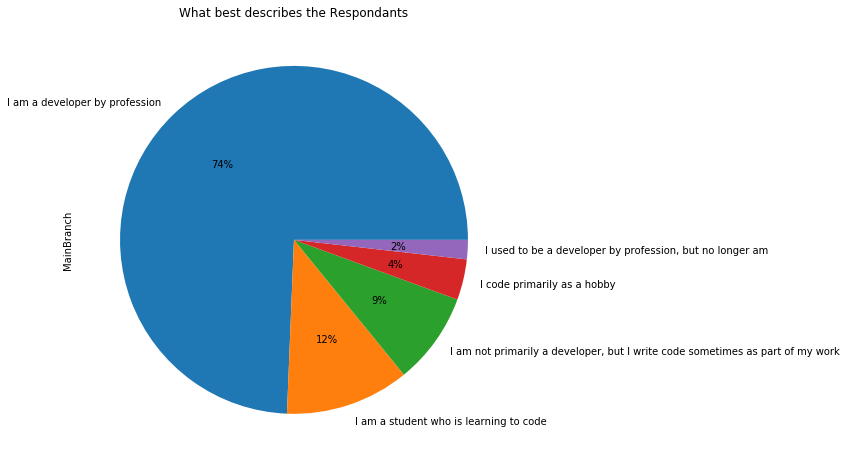

In [8]:
data['MainBranch'].value_counts().plot.pie(figsize=(8,8), autopct='%1.0f%%', title='What best describes the Respondants')

*Majority of the respondants are developer by profession*

**What percentage of people code as a hobby**

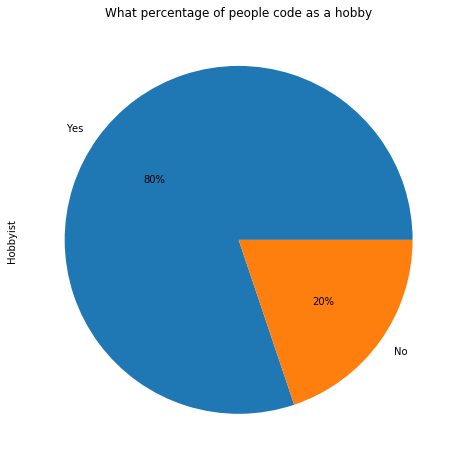

In [9]:
data['Hobbyist'].value_counts().plot.pie(figsize=(8,8), autopct='%1.0f%%', title="What percentage of people code as a hobby")

*4 out of 5 developers love to code*

**How is the contribution of coders towards Open source**

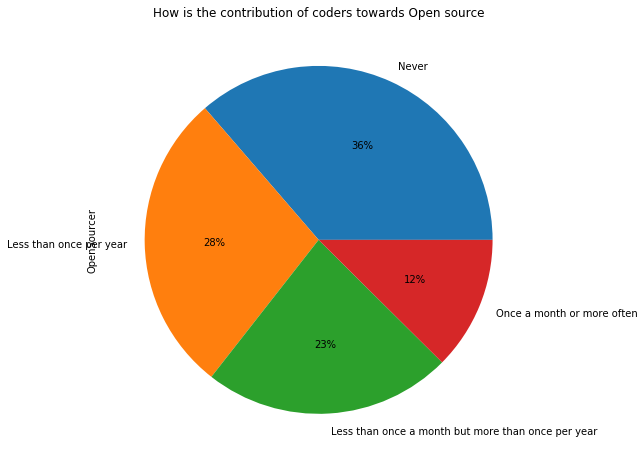

In [10]:
data['OpenSourcer'].value_counts().plot.pie(figsize=(8,8), autopct='%1.0f%%',
                                            title="How is the contribution of coders towards Open source")

In [11]:
pd.crosstab(data['MainBranch'], columns=[data['Hobbyist'], data['OpenSourcer']])

Hobbyist                                                                                                                      No  \
OpenSourcer                                                                   Less than once a month but more than once per year   
MainBranch                                                                                                                         
I am a developer by profession                                                 1818                                                
I am a student who is learning to code                                         218                                                 
I am not primarily a developer, but I write code sometimes as part of my work  256                                                 
I code primarily as a hobby                                                    0                                                   
I used to be a developer by profession, but no longer am                       28                                                  

Hobbyist                                                                                               \
OpenSourcer                                                                   Less than once per year   
MainBranch                                                                                              
I am a developer by profession                                                 3741                     
I am a student who is learning to code                                         273                      
I am not primarily a developer, but I write code sometimes as part of my work  440                      
I code primarily as a hobby                                                    0                        
I used to be a developer by profession, but no longer am                       82                       

Hobbyist                                                                             \
OpenSourcer                                                                   Never   
MainBranch                                                                            
I am a developer by profession                                                 7334   
I am a student who is learning to code                                         1012   
I am not primarily a developer, but I write code sometimes as part of my work  886    
I code primarily as a hobby                                                    0      
I used to be a developer by profession, but no longer am                       200    

Hobbyist                                                                                                  \
OpenSourcer                                                                   Once a month or more often   
MainBranch                                                                                                 
I am a developer by profession                                                 778                         
I am a student who is learning to code                                         165                         
I am not primarily a developer, but I write code sometimes as part of my work  110                         
I code primarily as a hobby                                                    0                           
I used to be a developer by profession, but no longer am                       28                          

Hobbyist                                                                                                                     Yes  \
OpenSourcer                                                                   Less than once a month but more than once per year   
MainBranch                                                                                                                         
I am a developer by profession                                                 14170                                               
I am a stude

*Most of the contributions towards opensource is through professional developers who like to code*

**ARE HOBBYISTS OPEN SOURCERS?**

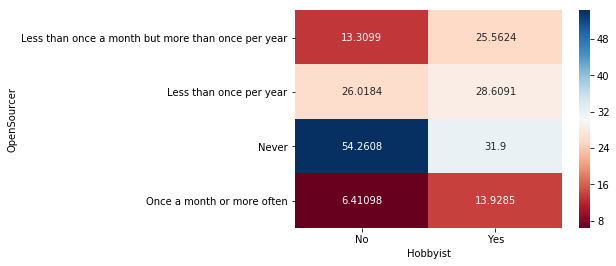

In [12]:
sns.heatmap(pd.crosstab(data['OpenSourcer'], data['Hobbyist']).apply(lambda r: 100*r/r.sum(), axis=0), annot=True, fmt='g', cmap='RdBu')

*Even the developers who like to code do not contribute much towards opensource*

**OPEN SOURCERS**

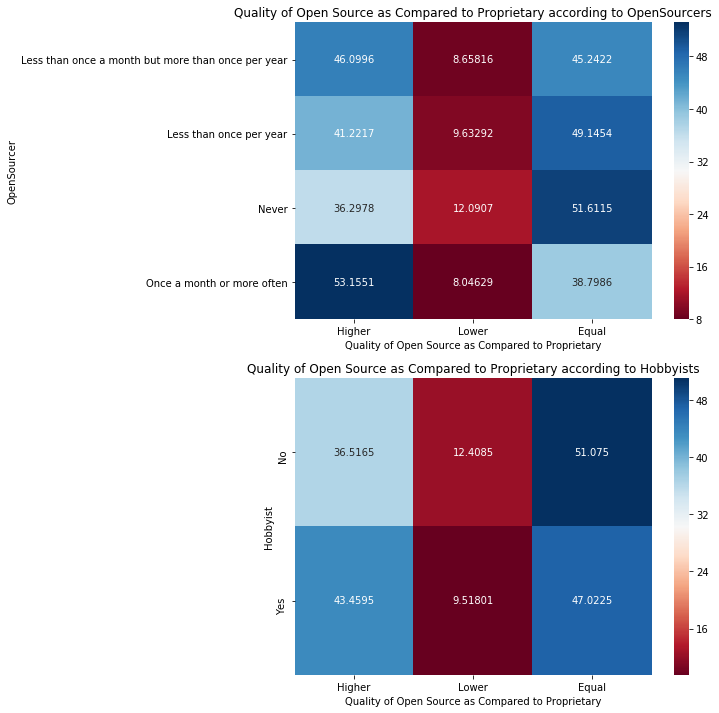

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,12))

g1 = sns.heatmap(pd.crosstab(data['OpenSourcer'], data['OpenSource']).apply(lambda r: 100*r/r.sum(), axis=1), annot=True, fmt='g', ax=ax[0], cmap='RdBu')
g1.set_xticklabels(['Higher', 'Lower', 'Equal'], rotation=0)
g1.set_xlabel('Quality of Open Source as Compared to Proprietary')
g1.set_title('Quality of Open Source as Compared to Proprietary according to OpenSourcers')

g2 = sns.heatmap(pd.crosstab(data['Hobbyist'], data['OpenSource']).apply(lambda r: 100*r/r.sum(), axis=1), annot=True, fmt='g', ax=ax[1], cmap='RdBu')
g2.set_xticklabels(['Higher', 'Lower', 'Equal'], rotation=0)
g2.set_xlabel('Quality of Open Source as Compared to Proprietary')
g2.set_title('Quality of Open Source as Compared to Proprietary according to Hobbyists')

plt.show()

*Hobbyists prefer the quality of opensource*

*The people who do not contribute still appreciate the quality of opensource*

**EMPLOYMENT**

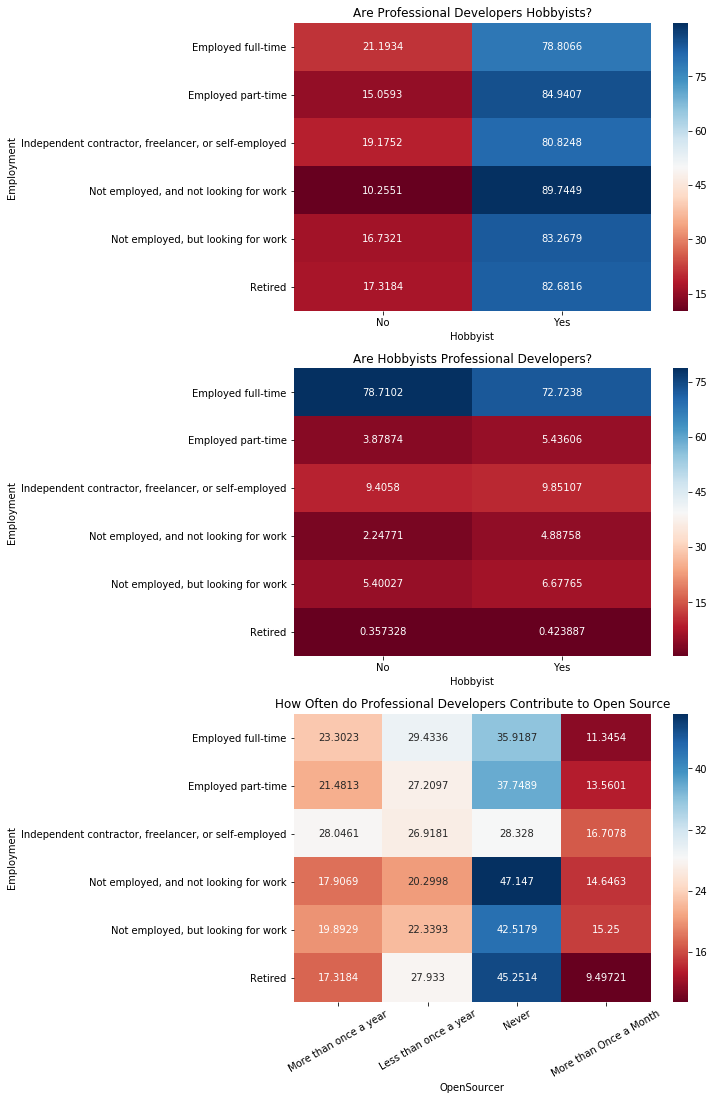

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,18))

g1 = sns.heatmap(pd.crosstab(data['Employment'], data['Hobbyist']).apply(lambda r: 100*r/r.sum(), axis=1), annot=True, fmt='g', ax=ax[0], cmap='RdBu')
g1.set_title('Are Professional Developers Hobbyists?')

g2 = sns.heatmap(pd.crosstab(data['Employment'], data['Hobbyist']).apply(lambda r: 100*r/r.sum(), axis=0), annot=True, fmt='g', ax=ax[1], cmap='RdBu')
g2.set_title('Are Hobbyists Professional Developers?')

g3 = sns.heatmap(pd.crosstab(data['Employment'], data['OpenSourcer']).apply(lambda r: 100*r/r.sum(), axis=1), annot=True, fmt='g', ax=ax[2], cmap='RdBu')
g3.set_xticklabels(['More than once a year', 'Less than once a year', 'Never', 'More than Once a Month'], rotation=30)
g3.set_title('How Often do Professional Developers Contribute to Open Source')

plt.show()

**NATIONALITY**

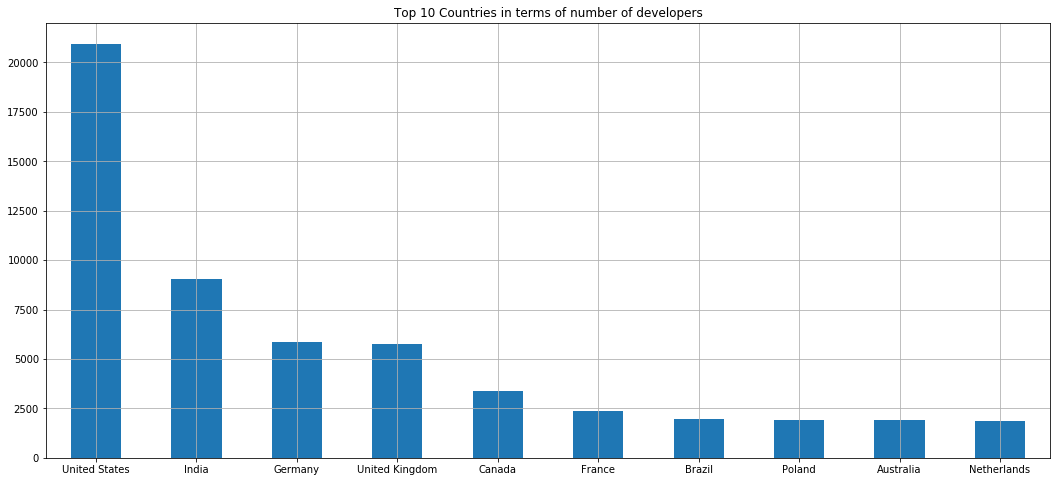

In [15]:
data['Country'].value_counts().head(10).plot.bar(grid=True, figsize=(18,8), rot=0,
                                                 title='Top 10 Countries in terms of number of developers')

**STUDENTS**

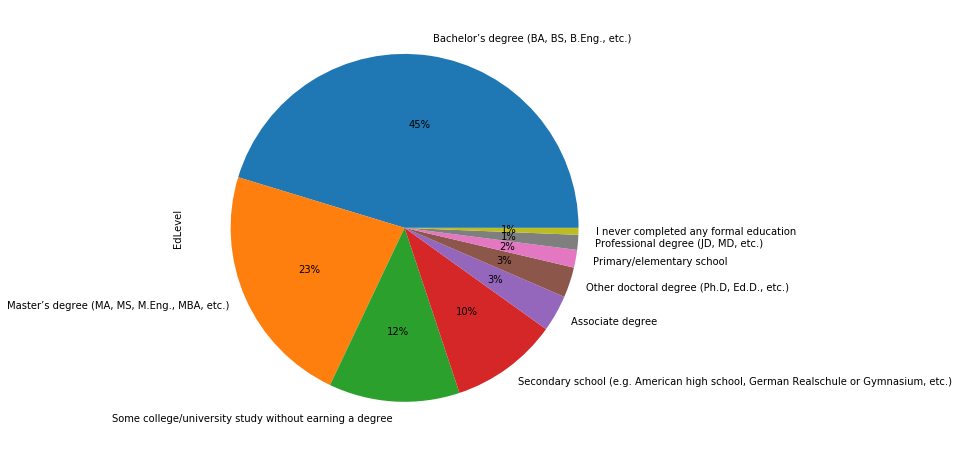

In [16]:
data['EdLevel'].value_counts().plot.pie(figsize=(8,8), autopct='%1.0f%%')

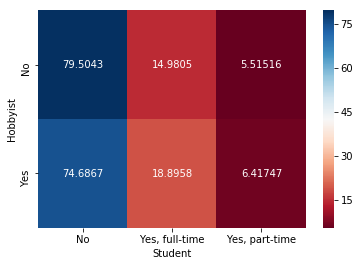

In [17]:
sns.heatmap(pd.crosstab(data['Hobbyist'], data['Student']).apply(lambda r: 100*r/r.sum(), axis=1), annot=True, fmt='g', cmap='RdBu')

*Mostly the respondants are not students*

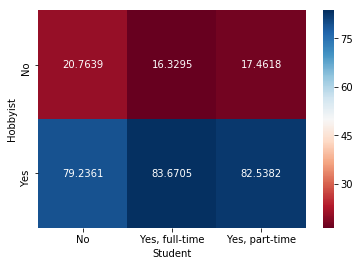

In [18]:
sns.heatmap(pd.crosstab(data['Hobbyist'], data['Student']).apply(lambda r: 100*r/r.sum(), axis=0), annot=True, fmt='g', cmap='RdBu')

*Mostly the respondants are hobbyists*

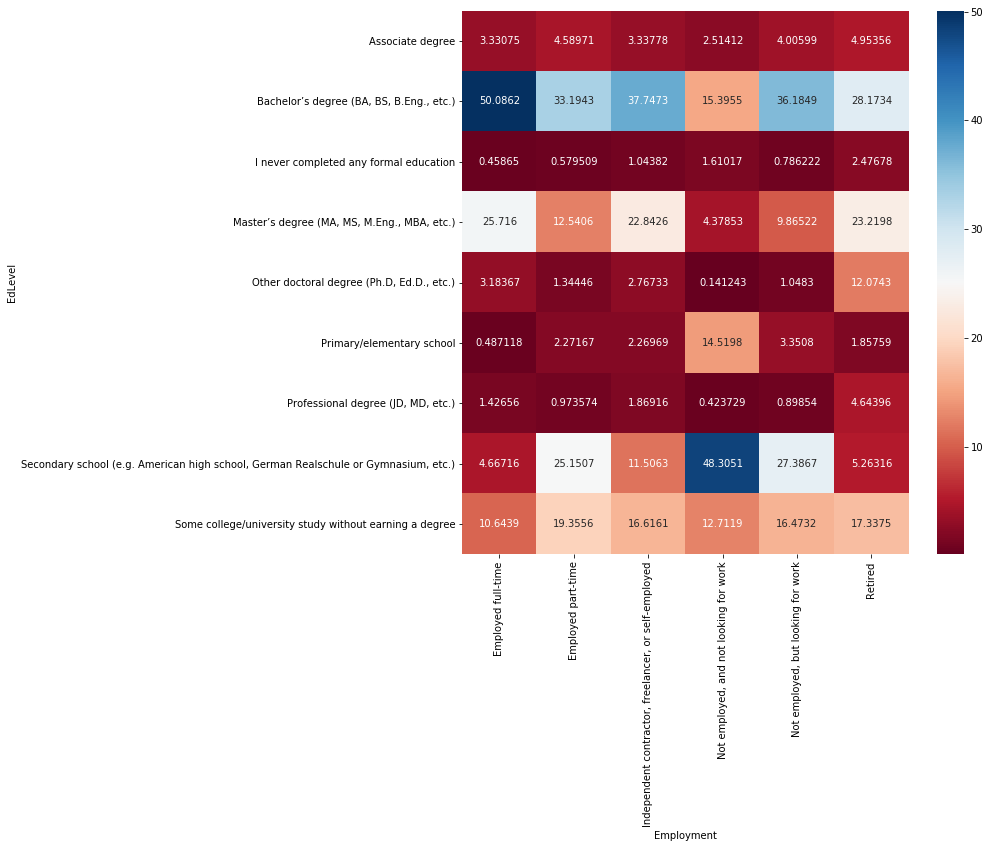

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.heatmap(pd.crosstab(data['EdLevel'], data['Employment']).apply(lambda r: 100*r/r.sum(), axis=0), annot=True, fmt='g', cmap='RdBu', ax=ax)

* *More than 50% full time employees have just a bachelor's degree*
* *More than 25% of full time employees have a master degree*
* *The numbers drop to 37% and 22% respectively for freelancers*
* *The numbers increase for college dropouts and secondary schools for freelancers*

**UNDER GRAD MAJOR**

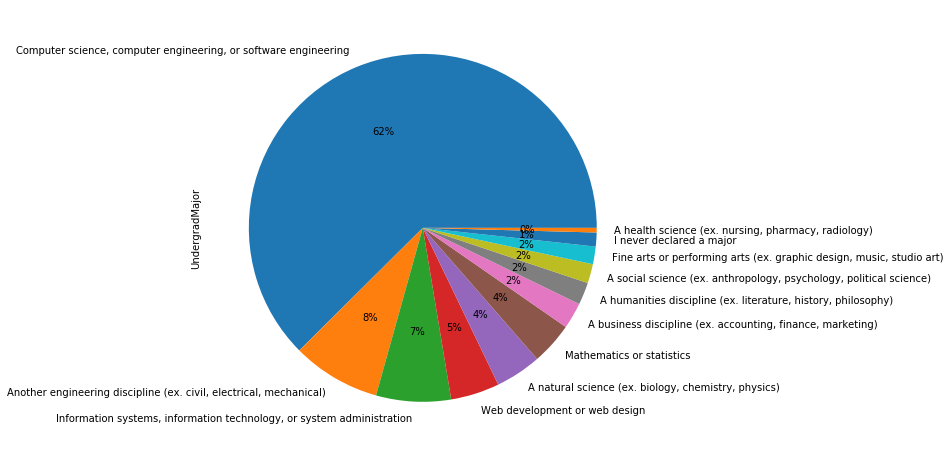

In [20]:
data['UndergradMajor'].value_counts().plot.pie(figsize=(8,8), autopct='%1.0f%%')

**NON DEGREE EDUCATION**

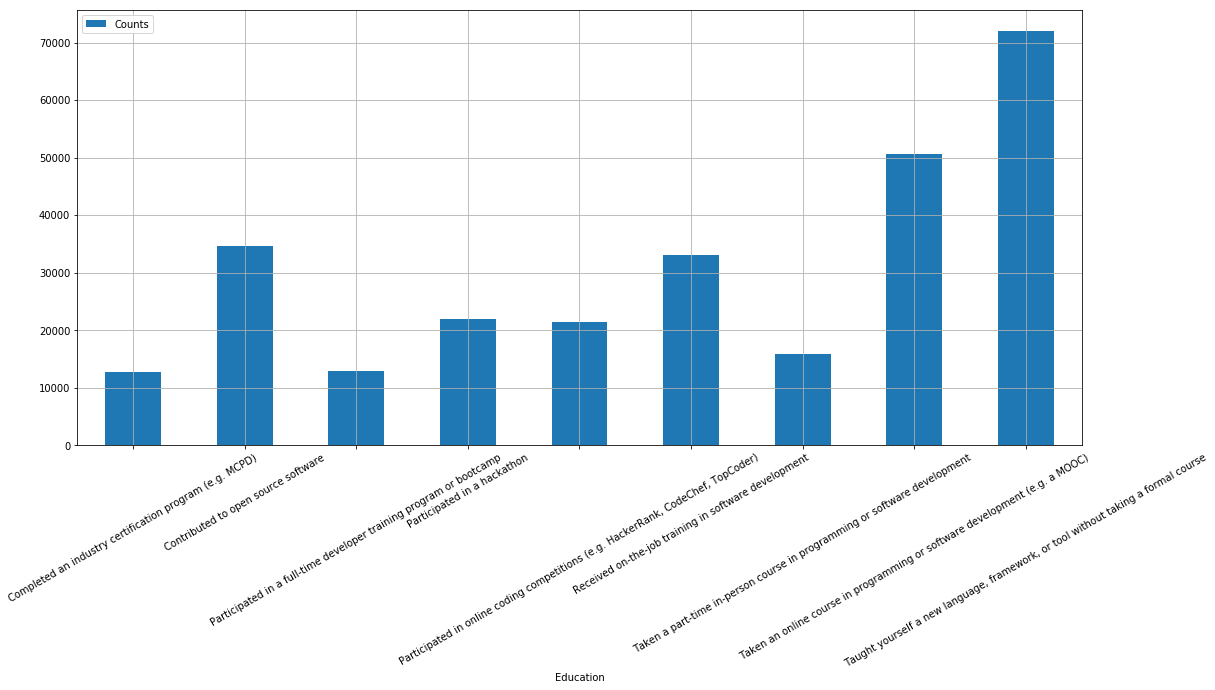

In [21]:
nondegree = pd.DataFrame(data['EduOther'].value_counts()).reset_index()
nondegree.columns=['Education', 'Counts']
nondegree['Education'] = nondegree['Education'].apply(lambda x: x.split(';'))
nondegree = nondegree.explode('Education').groupby('Education').sum()
nondegree.plot.bar(figsize=(18,8), grid=True, rot=30)

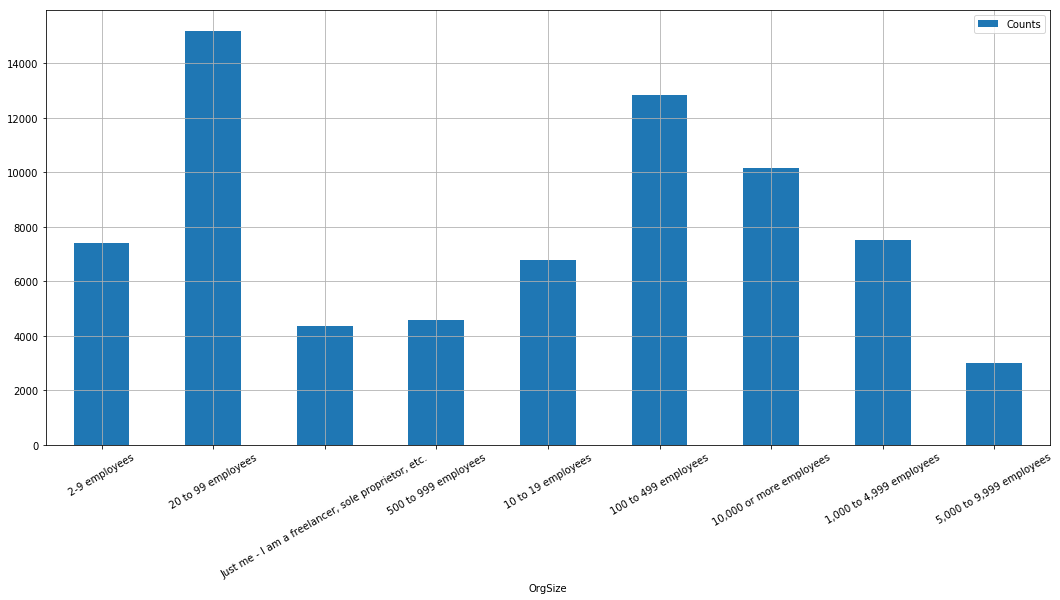

In [22]:
_ = pd.DataFrame(data['OrgSize'].value_counts(sort=False)).reset_index().reindex([6, 1, 3, 7, 4, 8, 2, 5, 0])
_.columns = ['OrgSize', 'Counts']
_.plot.bar(figsize=(18,8), grid=True, rot=30, x='OrgSize')

**DEVTYPE - JOB, CAREER SATISFACTION AND AVG COMPENSATION**

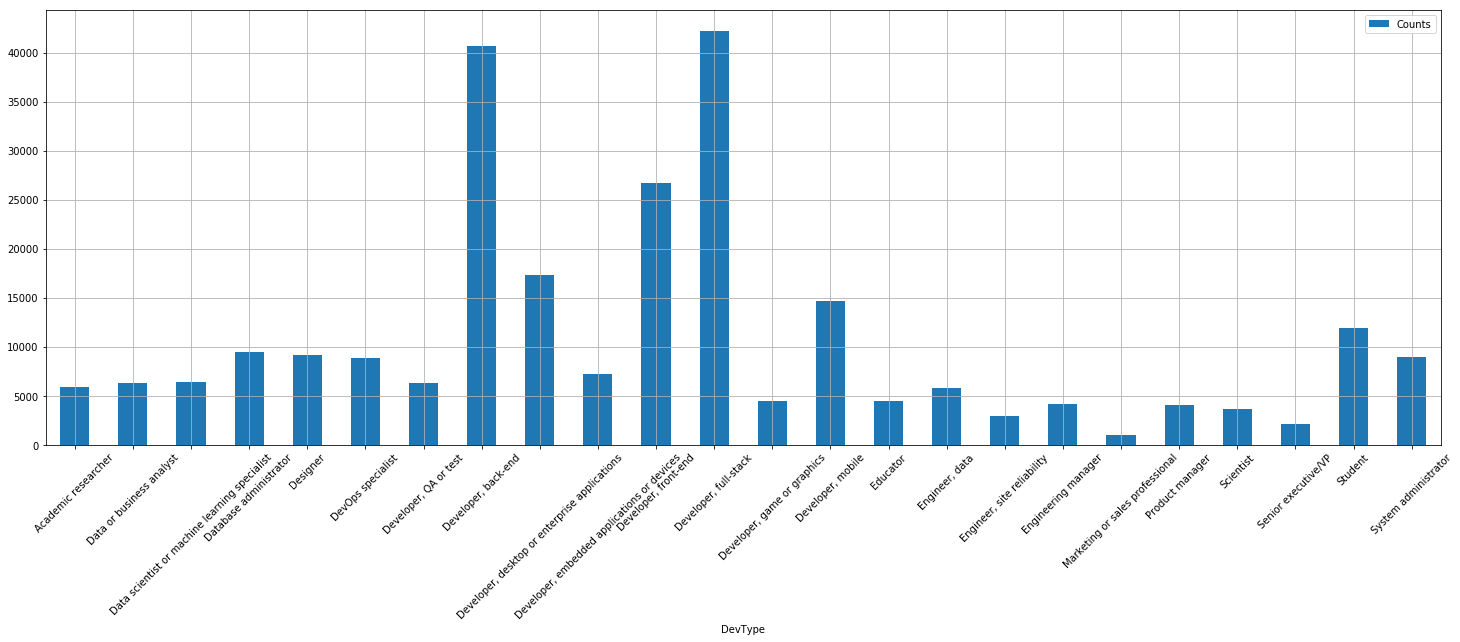

In [23]:
devtype = pd.DataFrame(data['DevType'].value_counts()).reset_index()
devtype.columns=['DevType', 'Counts']
devtype['DevType'] = devtype['DevType'].apply(lambda x: x.split(';'))
devtype = devtype.explode('DevType').groupby('DevType').sum()
devtype.plot.bar(figsize=(25,8), grid=True, rot=45)

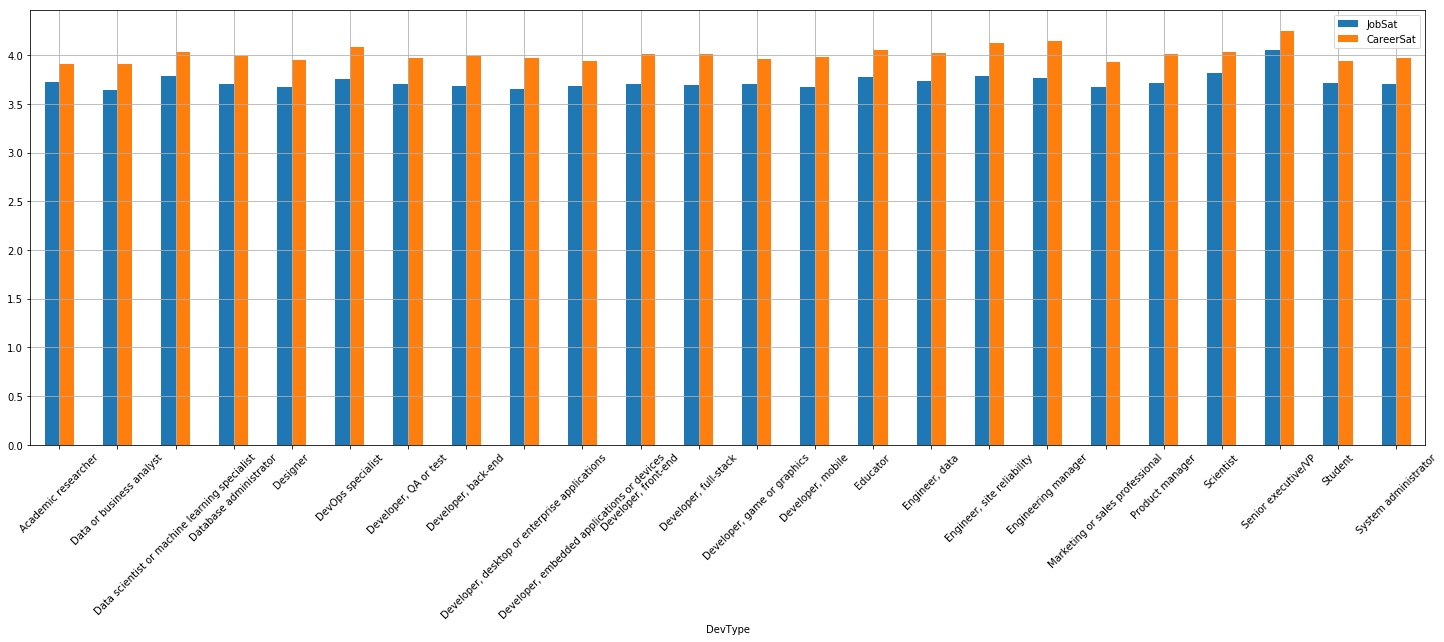

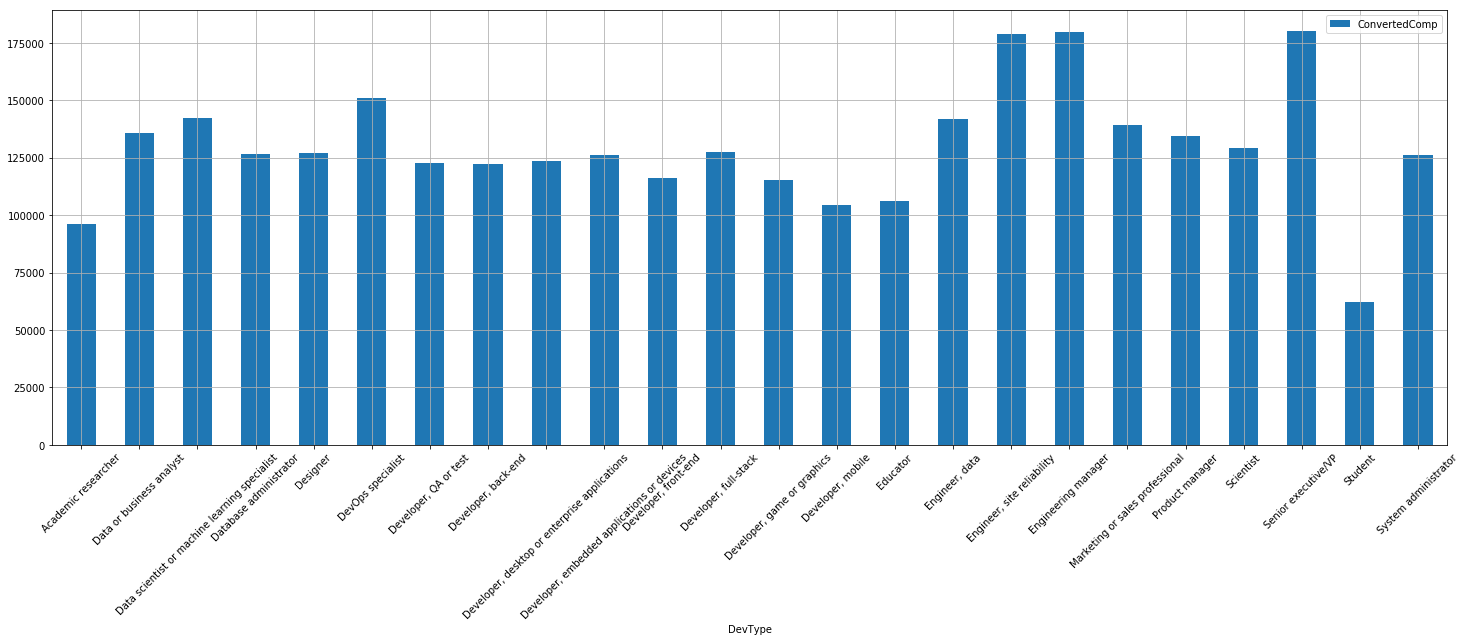

In [24]:
_ = data[['JobSat', 'CareerSat', 'DevType', 'ConvertedComp']]
_.dropna(inplace=True)
_['DevType'] = _['DevType'].apply(lambda x: x.split(';'))
_ = _.explode('DevType')

def satisfaction(x):
    if x == 'Very satisfied':
        return 5
    if x == 'Slightly satisfied':
        return 4
    if x == 'Neither satisfied nor dissatisfied':
        return 3
    if x == 'Slightly dissatisfied':
        return 2
    if x == 'Very dissatisfied':
        return 1

_['JobSat'] = _['JobSat'].apply(satisfaction)
_['CareerSat'] = _['CareerSat'].apply(satisfaction)
_.groupby('DevType')[['JobSat', 'CareerSat']].mean().plot.bar(figsize=(25,8), grid=True, rot=45)
_.groupby('DevType')[['ConvertedComp']].mean().plot.bar(figsize=(25,8), grid=True, rot=45)

**YEARS OF CODING**

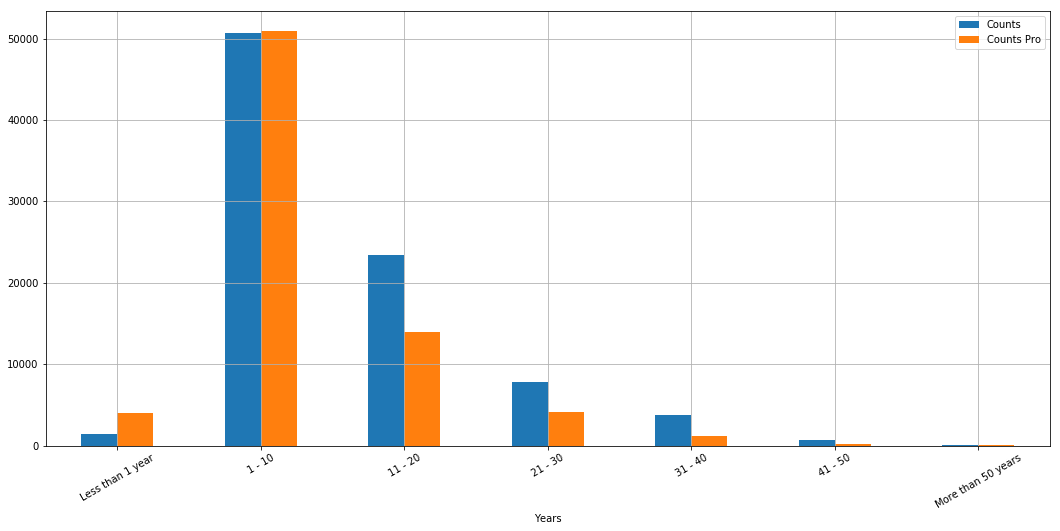

In [25]:
def generalize(x):
    if x == 'Less than 1 year' or x == 'More than 50 years':
        return x
    x = int(x)
    if 1 <= x <= 10:
        return '1 - 10'
    if 11 <= x <= 20:
        return '11 - 20'
    if 21 <= x <= 30:
        return '21 - 30'
    if 31 <= x <= 40:
        return '31 - 40'
    if 41 <= x <= 50:
        return '41 - 50'
    
yearscode = pd.DataFrame(data['YearsCode'].value_counts()).reset_index()
yearscode.columns=['Years', 'Counts']
yearscode['Years'] = yearscode['Years'].apply(generalize)
yearscode = yearscode.groupby('Years').sum()

yearscodepro = pd.DataFrame(data['YearsCodePro'].value_counts()).reset_index()
yearscodepro.columns=['Years', 'Counts Pro']
yearscodepro['Years'] = yearscodepro['Years'].apply(generalize)
yearscodepro = yearscodepro.groupby('Years').sum()

yearscode.merge(yearscodepro, on='Years').reset_index().reindex([5,0,1,2,3,4,6]).plot.bar(figsize=(18,8),
                                                                                          grid=True, rot=30, x='Years')

**AGE AT WHICH DEVS START CODING**

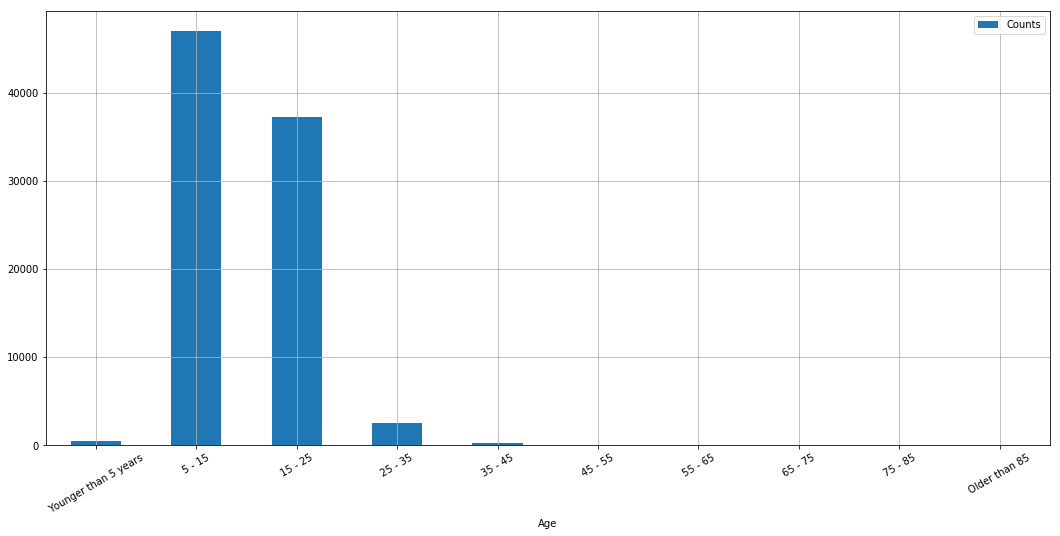

In [26]:
def generalize(x):
    if x == 'Younger than 5 years' or x == 'Older than 85':
        return x
    x = int(x)
    if 5 <= x <= 15:
        return '5 - 15'
    if 15 <= x <= 25:
        return '15 - 25'
    if 25 <= x <= 35:
        return '25 - 35'
    if 35 <= x <= 45:
        return '35 - 45'
    if 45 <= x <= 55:
        return '45 - 55'
    if 55 <= x <= 65:
        return '55 - 65'
    if 65 <= x <= 75:
        return '65 - 75'
    if 75 <= x <= 85:
        return '75 - 85'
age = pd.DataFrame(data['Age1stCode'].value_counts()).reset_index()
age.columns=['Age', 'Counts']
age['Age'] = age['Age'].apply(generalize)
age = age.groupby('Age').sum()
age.reset_index().reindex([9,4,0,1,2,3,5,6,7,8]).plot.bar(figsize=(18,8), grid=True, rot=30, x='Age')

**JOB FACTORS**

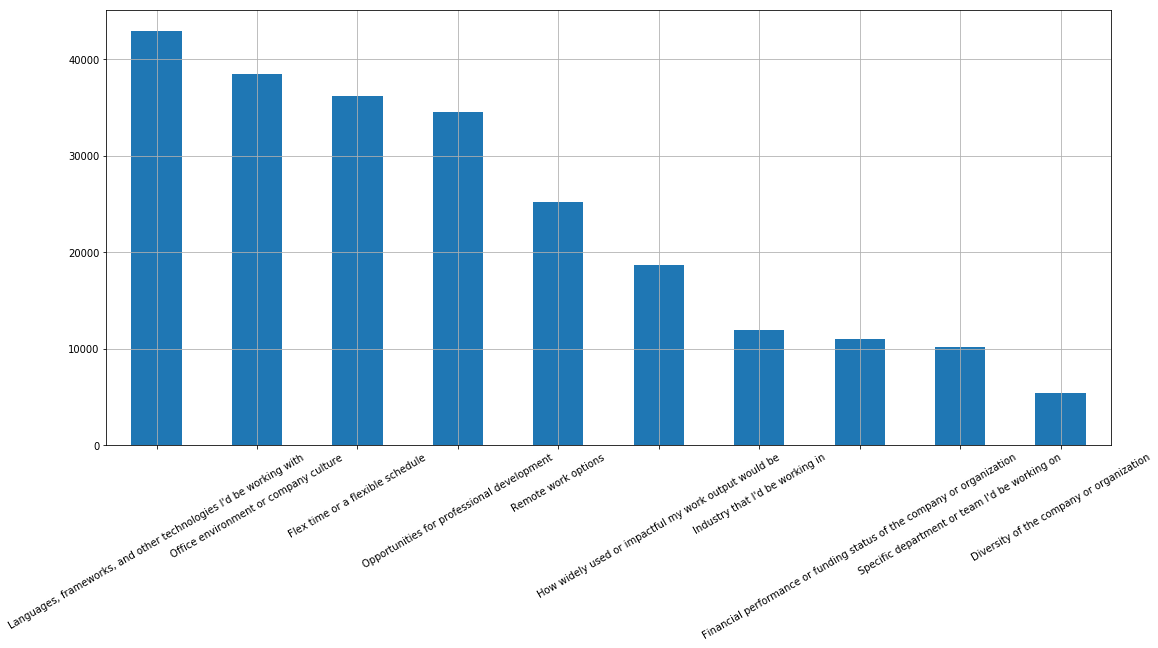

In [27]:
data['JobFactors'].dropna().apply(lambda x : x.split(';')).explode().value_counts().plot.bar(figsize=(18,8), 
                                                                                                grid=True, rot=30)

**WORK HOURS**

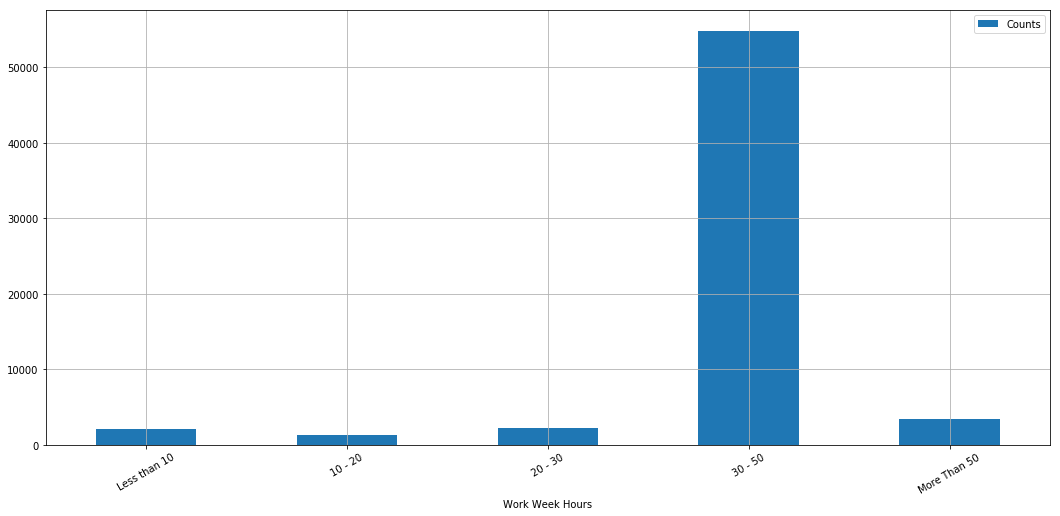

In [28]:
workhrs = pd.cut(data['WorkWeekHrs'], bins=[0, 10, 20, 30, 50, 105], 
       labels=['Less than 10', '10 - 20', '20 - 30', '30 - 50', 'More Than 50']).dropna()
workhrs = workhrs.value_counts().reset_index()
workhrs.columns = ['Work Week Hours', 'Counts'] 
workhrs.reindex([3,4,2,0,1]).plot.bar(figsize=(18,8), grid=True, rot=30, x='Work Week Hours')

**CHALLENGES TO PRODUCTIVITY**

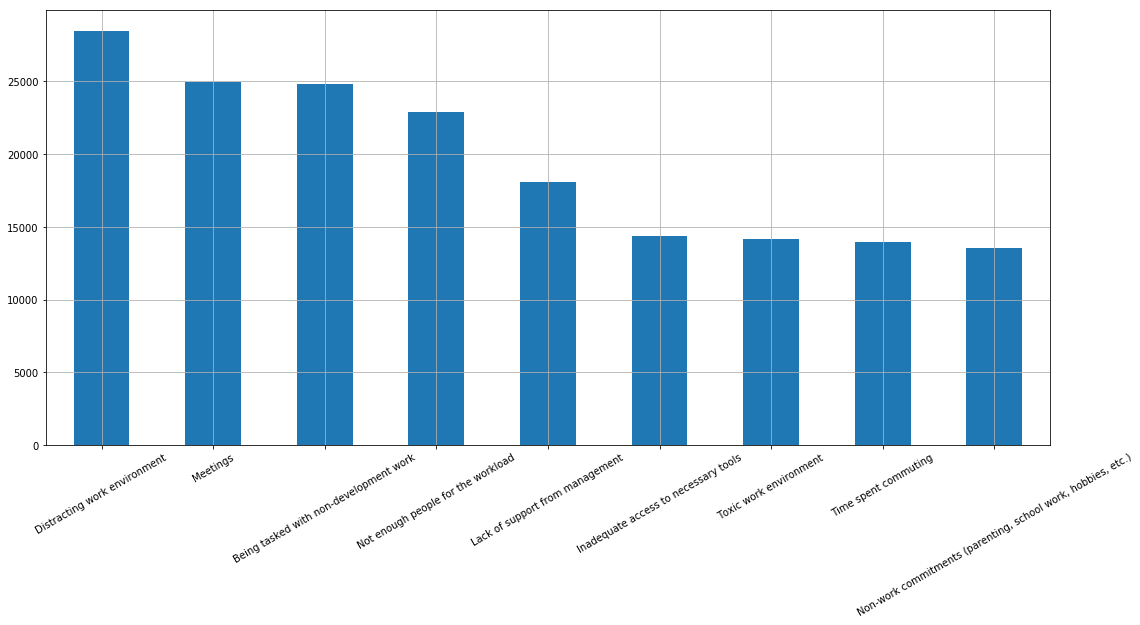

In [29]:
data['WorkChallenge'].dropna().apply(lambda x : x.split(';')).explode().value_counts().plot.bar(figsize=(18,8), 
                                                                                                grid=True, rot=30)

**PREFERRED WORKING LOCATION**

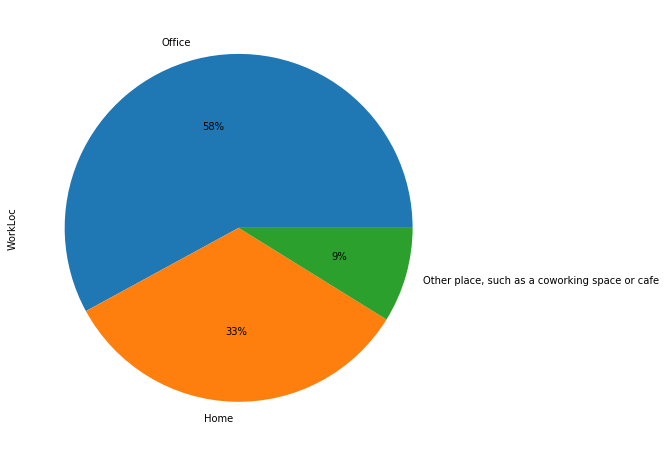

In [30]:
data['WorkLoc'].value_counts().plot.pie(figsize=(8,8), autopct='%1.0f%%')

**MOST POPULAR LANGUAGE**

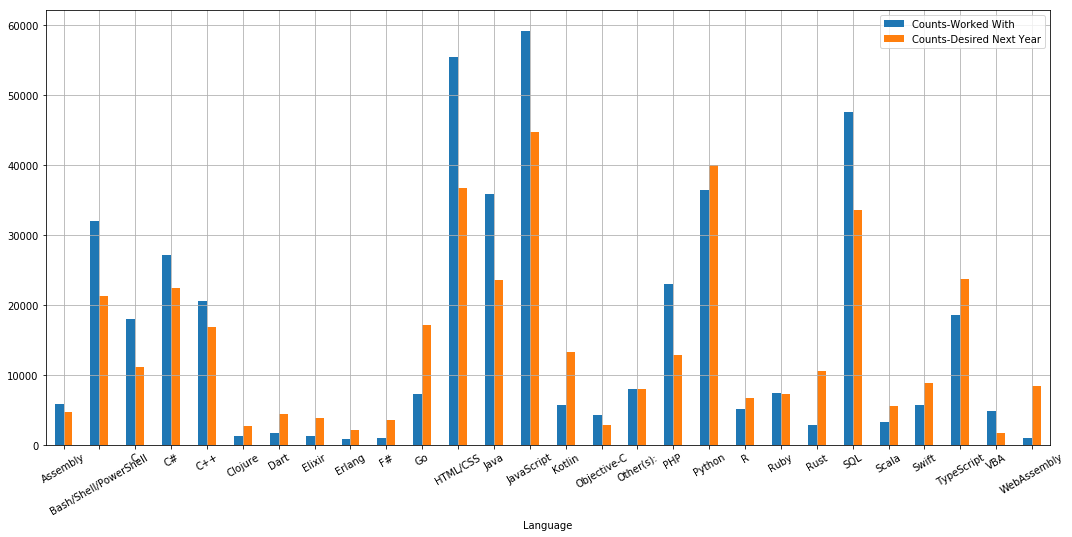

In [31]:
languages = pd.DataFrame(data['LanguageWorkedWith'].value_counts()).reset_index()
languages.columns=['Language', 'Counts-Worked With']
languages['Language'] = languages['Language'].apply(lambda x: x.split(';'))
languages = languages.explode('Language').groupby('Language').sum()

languages_ = pd.DataFrame(data['LanguageDesireNextYear'].value_counts()).reset_index()
languages_.columns=['Language', 'Counts-Desired Next Year']
languages_['Language'] = languages_['Language'].apply(lambda x: x.split(';'))
languages_ = languages_.explode('Language').groupby('Language').sum()

pd.concat([languages, languages_], axis=1).plot.bar(figsize=(18,8), grid=True, rot=30)

**MOST POPULAR DATABASE**

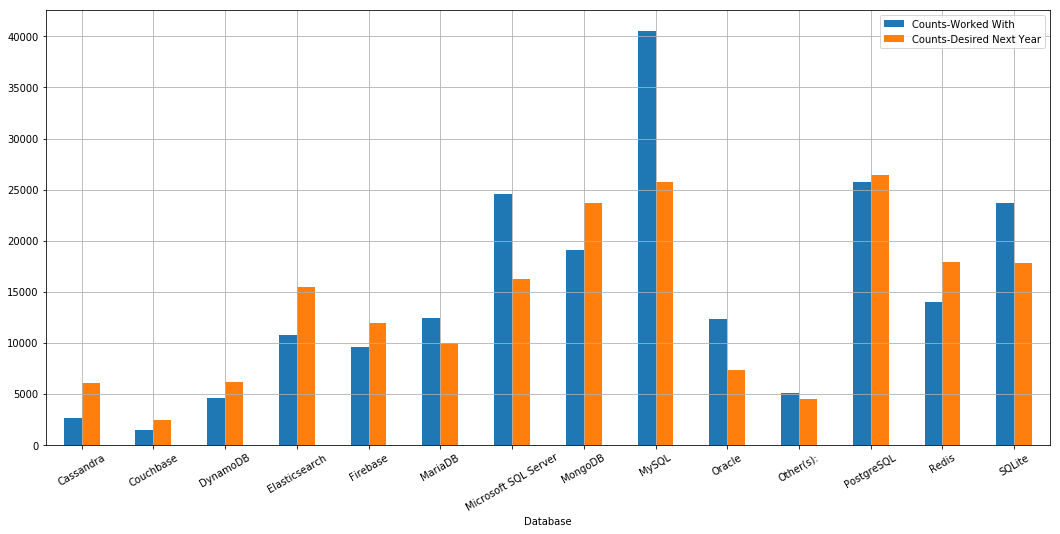

In [32]:
database = pd.DataFrame(data['DatabaseWorkedWith'].value_counts()).reset_index()
database.columns=['Database', 'Counts-Worked With']
database['Database'] = database['Database'].apply(lambda x: x.split(';'))
database = database.explode('Database').groupby('Database').sum()

database_ = pd.DataFrame(data['DatabaseDesireNextYear'].value_counts()).reset_index()
database_.columns=['Database', 'Counts-Desired Next Year']
database_['Database'] = database_['Database'].apply(lambda x: x.split(';'))
database_ = database_.explode('Database').groupby('Database').sum()

pd.concat([database, database_], axis=1).plot.bar(figsize=(18,8), grid=True, rot=30)

**MOST POPULAR PLATFORM**

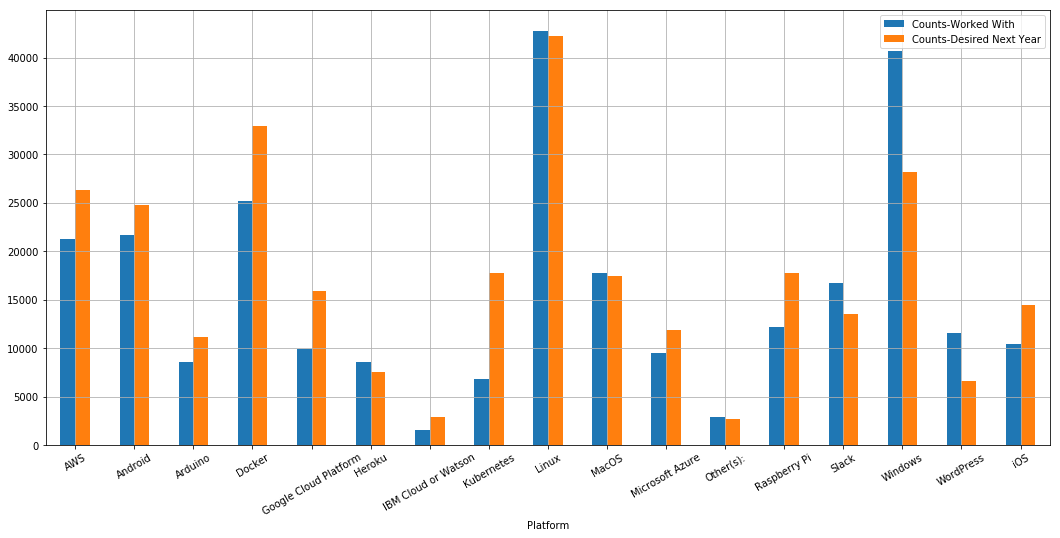

In [33]:
platform = pd.DataFrame(data['PlatformWorkedWith'].value_counts()).reset_index()
platform.columns=['Platform', 'Counts-Worked With']
platform['Platform'] = platform['Platform'].apply(lambda x: x.split(';'))
platform = platform.explode('Platform').groupby('Platform').sum()

platform_ = pd.DataFrame(data['PlatformDesireNextYear'].value_counts()).reset_index()
platform_.columns=['Platform', 'Counts-Desired Next Year']
platform_['Platform'] = platform_['Platform'].apply(lambda x: x.split(';'))
platform_ = platform_.explode('Platform').groupby('Platform').sum()

pd.concat([platform, platform_], axis=1).plot.bar(figsize=(18,8), grid=True, rot=30)

**MOST POPULAR WEBFRAMEWORK**

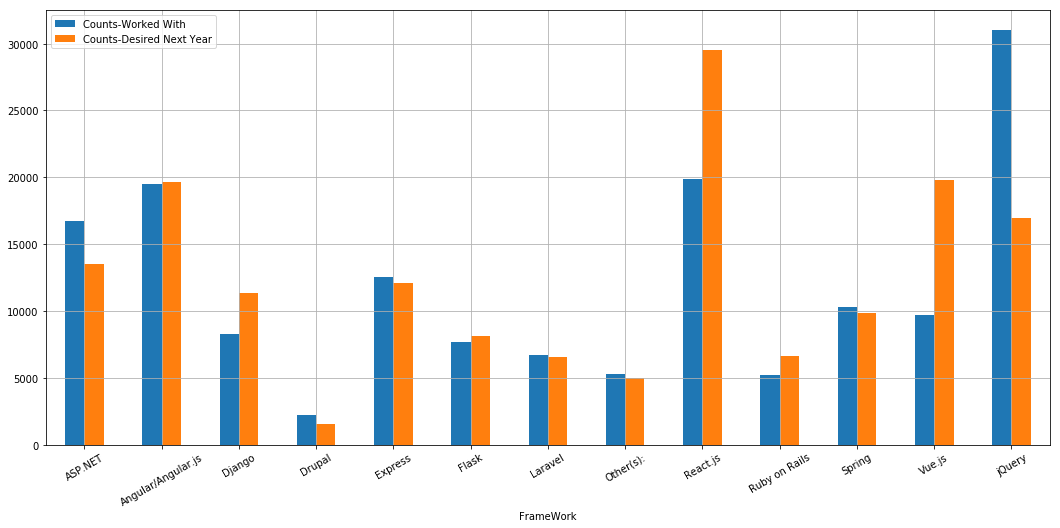

In [34]:
webframe = pd.DataFrame(data['WebFrameWorkedWith'].value_counts()).reset_index()
webframe.columns=['FrameWork', 'Counts-Worked With']
webframe['FrameWork'] = webframe['FrameWork'].apply(lambda x: x.split(';'))
webframe = webframe.explode('FrameWork').groupby('FrameWork').sum()

webframe_ = pd.DataFrame(data['WebFrameDesireNextYear'].value_counts()).reset_index()
webframe_.columns=['FrameWork', 'Counts-Desired Next Year']
webframe_['FrameWork'] = webframe_['FrameWork'].apply(lambda x: x.split(';'))
webframe_ = webframe_.explode('FrameWork').groupby('FrameWork').sum()

pd.concat([webframe, webframe_], axis=1).plot.bar(figsize=(18,8), grid=True, rot=30)

**MISC TECHNOLOGIES**

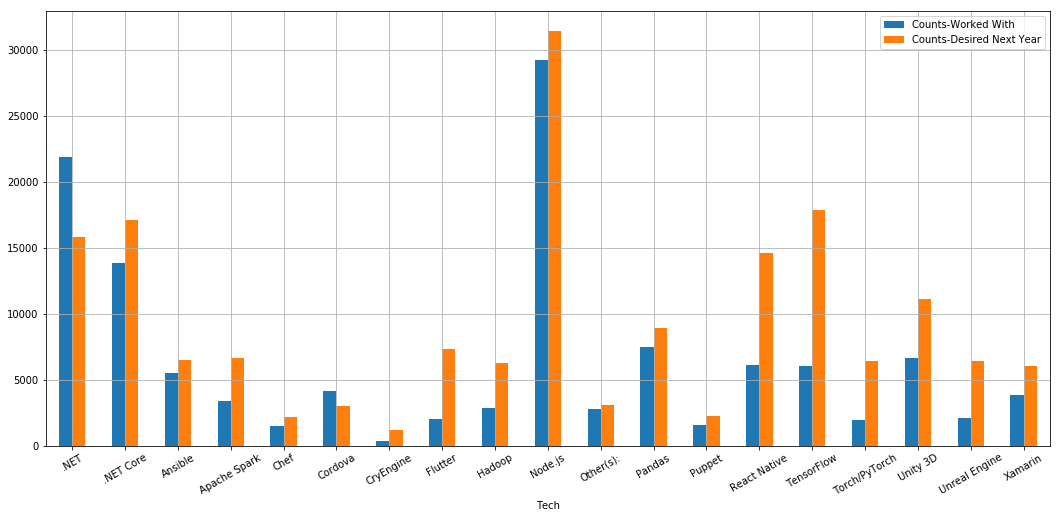

In [35]:
tech = pd.DataFrame(data['MiscTechWorkedWith'].value_counts()).reset_index()
tech.columns=['Tech', 'Counts-Worked With']
tech['Tech'] = tech['Tech'].apply(lambda x: x.split(';'))
tech = tech.explode('Tech').groupby('Tech').sum()

tech_ = pd.DataFrame(data['MiscTechDesireNextYear'].value_counts()).reset_index()
tech_.columns=['Tech', 'Counts-Desired Next Year']
tech_['Tech'] = tech_['Tech'].apply(lambda x: x.split(';'))
tech_ = tech_.explode('Tech').groupby('Tech').sum()

pd.concat([tech, tech_], axis=1).plot.bar(figsize=(18,8), grid=True, rot=30)

**MOST POPULAR DEV ENVIRONMENT**

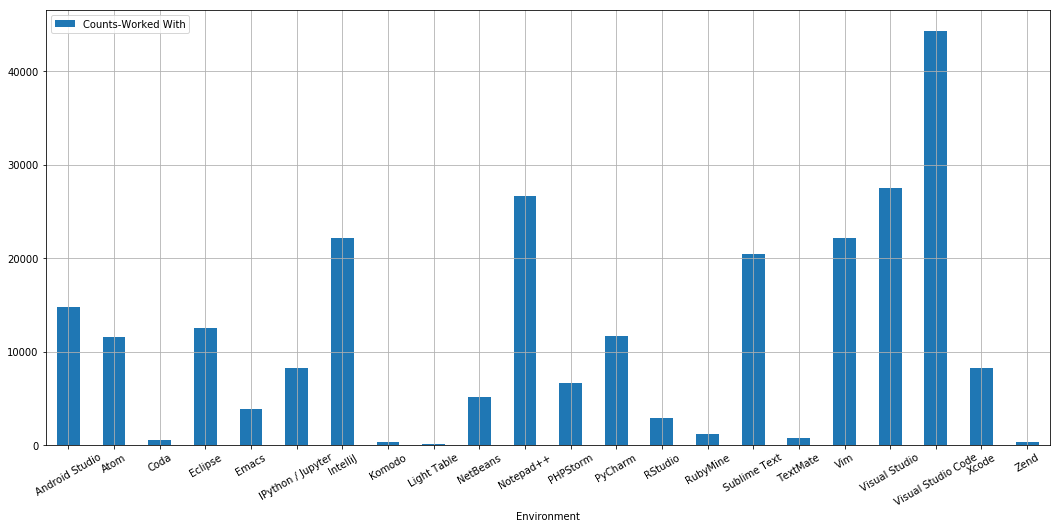

In [36]:
environ = pd.DataFrame(data['DevEnviron'].value_counts()).reset_index()
environ.columns=['Environment', 'Counts-Worked With']
environ['Environment'] = environ['Environment'].apply(lambda x: x.split(';'))
environ = environ.explode('Environment').groupby('Environment').sum()
environ.plot.bar(figsize=(18,8), grid=True, rot=30)

**MOST POPULAR OPERATING SYSTEM**

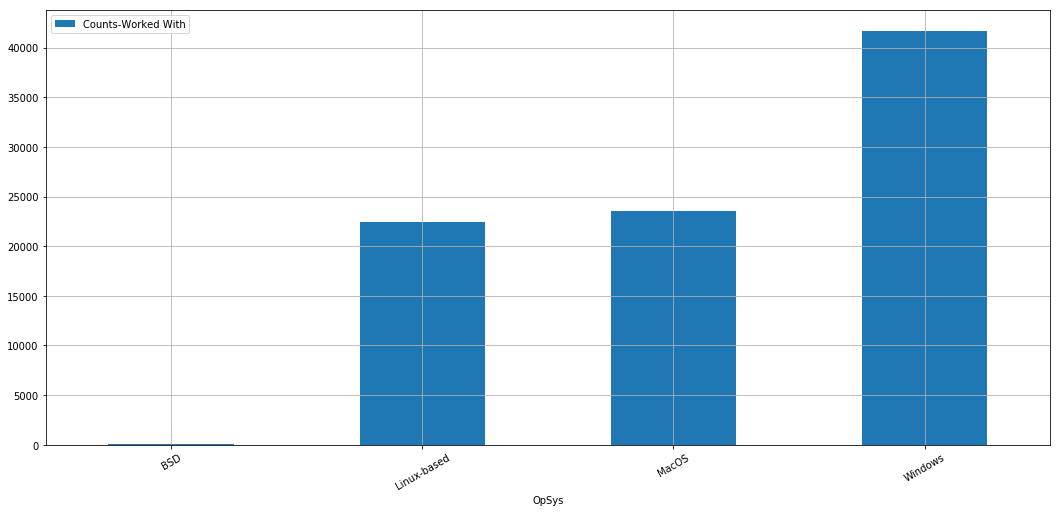

In [37]:
opsys = pd.DataFrame(data['OpSys'].value_counts()).reset_index()
opsys.columns=['OpSys', 'Counts-Worked With']
opsys['OpSys'] = opsys['OpSys'].apply(lambda x: x.split(';'))
opsys = opsys.explode('OpSys').groupby('OpSys').sum()
opsys.plot.bar(figsize=(18,8), grid=True, rot=30)

**MOST POPULAR SOCIALMEDIA AMONG DEVELOPERS**

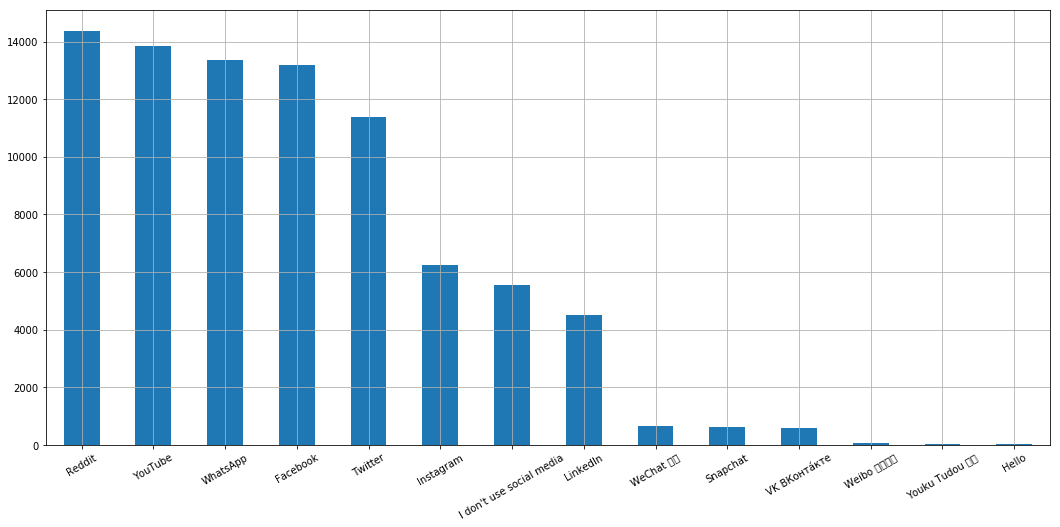

In [38]:
data['SocialMedia'].value_counts().plot.bar(figsize=(18,8), grid=True, rot=30)